In [1]:
# import libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load imdb HuggingFace dataset

print("Loading dataset...")
dataset = load_dataset("imdb")
print("dataset uploaded.")


Loading dataset...


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

dataset uploaded.


In [3]:
# Explore dataset

print(f"Dataset structure: {dataset}")
print(f"\nTrain samples: {len(dataset['train'])}")
print(f"Test samples: {len(dataset['test'])}")

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Train samples: 25000
Test samples: 25000


In [4]:
# View sample data

print("\nSample data:")
print(dataset['train'][0])



Sample data:
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are 

In [6]:
# Convert to pandas for analysis

train_df = pd.DataFrame(dataset['train'])
print(train_df.head())

                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0


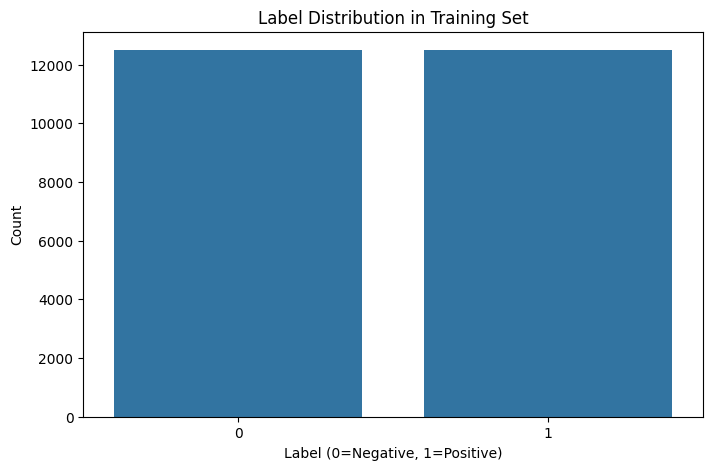

In [7]:
# Visualize label distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='label')
plt.title('Label Distribution in Training Set')
plt.xlabel('Label (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

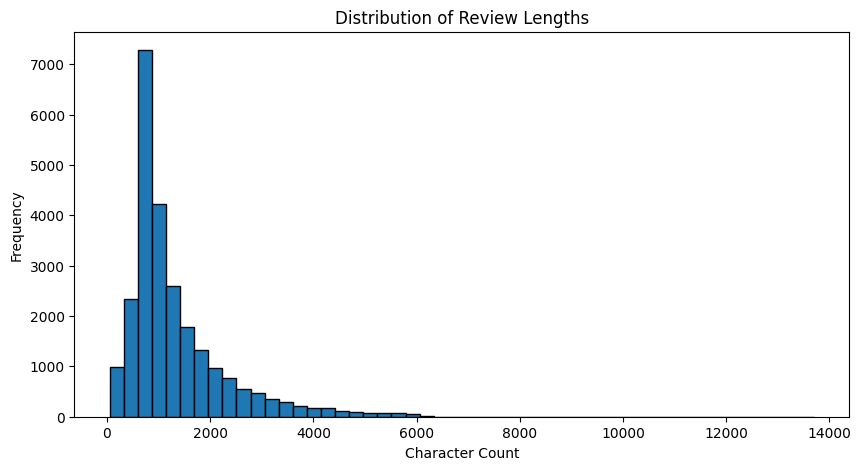


Average review length: 1325 characters
Max review length: 13704 characters


In [9]:
# Analyze text lengths

train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(train_df['text_length'], bins=50, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

print(f"\nAverage review length: {train_df['text_length'].mean():.0f} characters")
print(f"Max review length: {train_df['text_length'].max()} characters")
